# Análises Exploratória dos dados de treino

## Setup e imports
Utilizamos os pacotes: *pandas, numpy, seaborn* e *matplotlib*


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/Shareddrives/ProjetoAM/music-inRecomendation/

Mounted at /content/drive/
/content/drive/Shareddrives/ProjetoAM/music-inRecomendation


### Importação dos dados de treino


In [6]:
df=pd.read_csv('data/dados_treino.csv')
df.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758


## Data cleaning

Para cada uma das colunas verificar dados inconsistêntes

*e.g* 
* Tempo negativo
* % > 100


In [8]:
print("Tamanho inicial: "+str(len(df)))

df.query('duracao >0', inplace=True)
print("Músicas com duração acima de 0: "+str(len(df)))

df.query('PctCantada <= 100 & PctCantada>=0',inplace=True)
print("Porcentagem cantada entre 0 e 100: "+str(len(df)))
df.query('PctRap <= 100 & PctRap>=0',inplace=True)
print("Porcentagem de rap entre 0 e 100: "+str(len(df)))

print('músicas sem um modo definido: '+str(len(df[df.modo.isna()])))

Tamanho inicial: 4921
Músicas com duração acima de 0: 4921
Porcentagem cantada entre 0 e 100: 4921
Porcentagem de rap entre 0 e 100: 4921
músicas sem um modo definido: 438


Temos uma quantidade consideravel de musicas sem um modo definido (438).

In [9]:
df[df.modo.isna()].agg({'unique'}).loc[:,'bateria':'Tem_Instr_Cordas']

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas
unique,"[Acústica, Eletrônica, Nenhuma]","[False, True]","[True, False]","[False, True]","[False, True]","[True, False]","[True, False]","[True, False]","[False, True]"


Percebemos que são músicas que podem possuir  todos instrumentos, inclusive os harmonicos e melódicos, o que indica que a ausência de uma tonalidade é realmente um dado faltante.

In [10]:
print('Músicas por cliente')
display(df.id_cliente.value_counts().to_frame())
print('Músicas por cliente (sem a tonalidade)')
display(df[df.modo.isna()].id_cliente.value_counts().to_frame())

Músicas por cliente


,id_cliente
#ID7758,2473
#ID4820,2448


Músicas por cliente (sem a tonalidade)


,id_cliente
#ID4820,231
#ID7758,207


Como podemos notar, por volta de 10% das músicas para cada cliente não possuem uma tonalidade indicada, o que pode ser considerada uma perda razoável de informação.

In [11]:
df.agg({'unique'})

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente
unique,"[Eletrônica, Acústica, Nenhuma]","[True, False]","[True, False]","[False, True]","[True, False]","[True, False]","[False, True]","[False, True]","[True, False]","[110.275495473565, 117.367073297504, 100.13420...","[-6.3221624510694, -6.50900651603091, -12.7178...","[72.90901423020841, 72.6541325899253, 74.12955...","[16.308793195307, 0.0, 18.8186518137422, 62.53...","[233021, 166437, 159426, 244636, 166520, 18398...","[2004, 1999, 2002, 1991, 2018, 2016, 2001, 201...","[False, True]","[A#, E, c, g, d#, C#, a, f#, C, nan, d, f, F#,...","[True, False]","[True, False]","[2, 8, 5, 7, 3, 4, 6, 1, 9, 10, 11]","[#ID7758, #ID4820]"


#### Contagem do gosto das músicas por usuário


In [15]:
df.groupby('id_cliente')['gostou'].value_counts().reset_index(0).rename(columns={'gostou':'contagem'})

,id_cliente,contagem
gostou,,
False,#ID4820,1882
True,#ID4820,566
False,#ID7758,1612
True,#ID7758,861


In [17]:
cliente1 = df[df.id_cliente=="#ID7758"]
cliente2 = df[df.id_cliente=="#ID4820"]

#### Verificação da presença de NA nos dados

In [16]:
df.isna().any().reset_index()

,index,0
0,bateria,False
1,Tem_Instr_Violao_Viola,False
2,Tem_Instr_Guitarra,False
3,Tem_Instr_Cavaco,False
4,Tem_Instr_Sintetizador_Teclado,False
5,Tem_Instr_Piano,False
6,Tem_Instr_Metais,False
7,Tem_Instr_Madeiras,False
8,Tem_Instr_Cordas,False
9,BPM,False


#### Análise das tonalidades
É interessante notar que os `modos` estão apresentados através das letras **maiusculas** representando **tonalidades maiores** e **minusculas** representando **tonalidades menores**

In [23]:
df['tom_menor']=df.modo.str.islower()

In [24]:
def tom(df):
  if df.tom_menor == True:
    return 'menor'
  else:
    return 'maior'
df['tom']=df.apply(tom, axis=1)

In [25]:
df.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente,tom_menor,tom
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758,False,maior
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758,False,maior
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758,True,menor
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758,True,menor
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758,True,menor


In [31]:
modos_counts=df.modo.value_counts(dropna=False).reset_index()\
.rename(columns={'index':'tonalidade','modo':'contagem'})

In [32]:
modos_counts.fillna("N_spec", inplace=True)

Text(0.5, 1.0, 'Número de músicas por Tom')

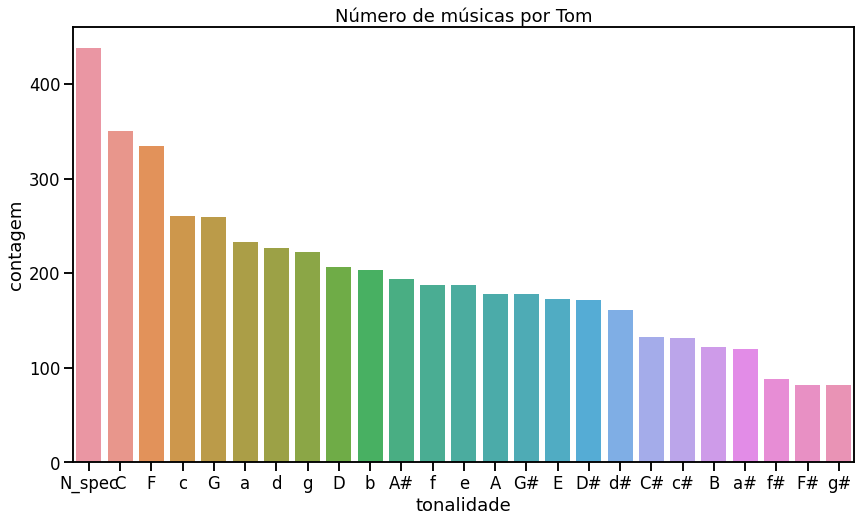

In [49]:
plt.figure(figsize=(14,8))
sns.set_context('talk')
ax=sns.barplot(x="tonalidade",y="contagem", data=modos_counts)
ax.set_title('Número de músicas por Tom')


Text(0.5, 1.0, 'Frequência em que as músicas são curtidas baseado no Tom')

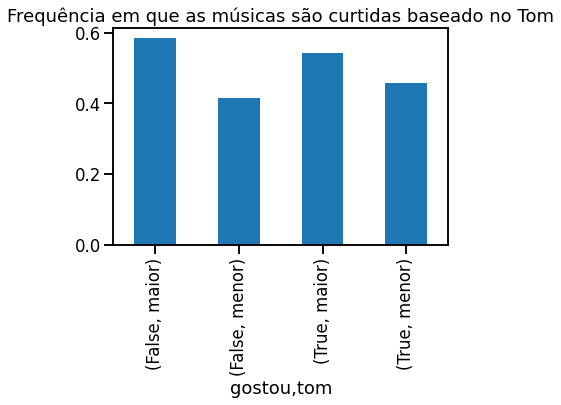

In [50]:
df.groupby('gostou')['tom'].value_counts(normalize=True).plot(kind='bar').set_title('Frequência em que as músicas são curtidas baseado no Tom')


#### Distribuição de variáveis continuas

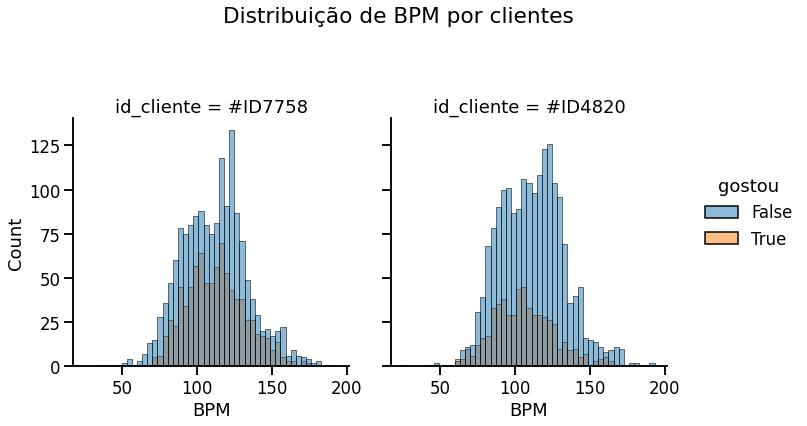

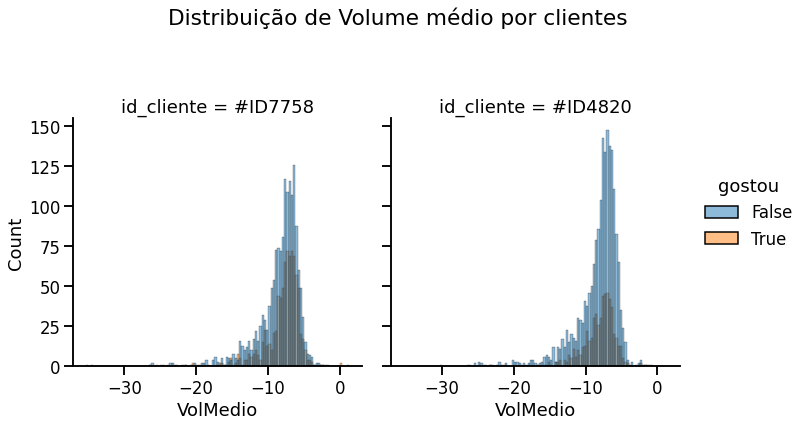

In [86]:
sns.displot(data=df, x="BPM",  hue="gostou", col="id_cliente").fig.suptitle('Distribuição de BPM por clientes', y=1.2)
plt.show()
sns.displot(data=df, x="VolMedio",  hue="gostou", col="id_cliente").fig.suptitle('Distribuição de Volume médio por clientes',y=1.2)
plt.show()


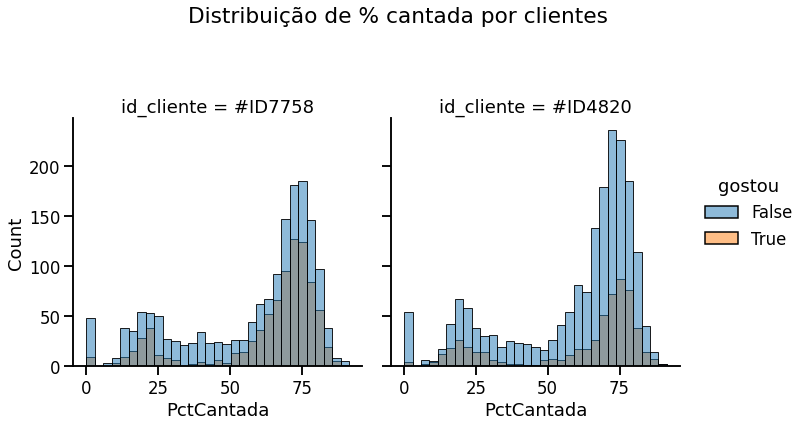

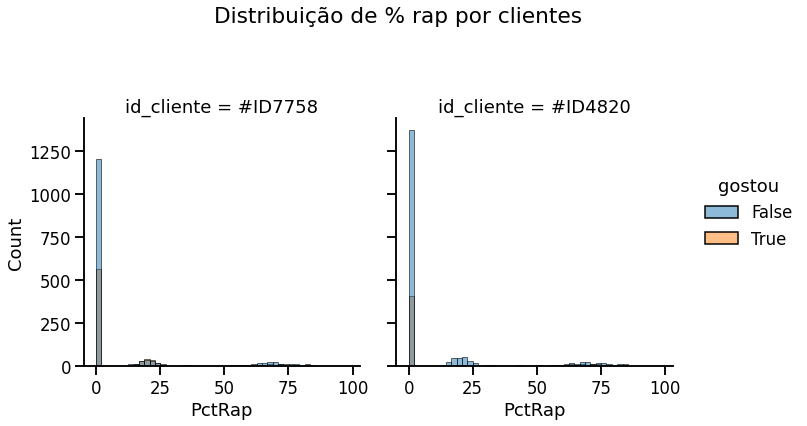

In [89]:
sns.displot(data=df, x="PctCantada", hue="gostou", col="id_cliente").fig.suptitle('Distribuição de % cantada por clientes',y=1.2)
plt.show()
sns.displot(data=df, x="PctRap", hue="gostou", col="id_cliente").fig.suptitle('Distribuição de % rap por clientes',y=1.2)
plt.show()

Text(0.5, 1.2, 'Relação de reprodução, BPM e cliente')

<Figure size 864x576 with 0 Axes>

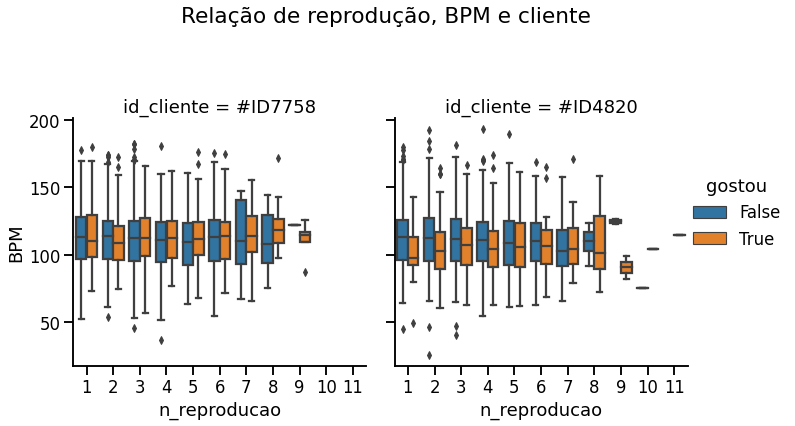

In [90]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
sns.catplot(data=df, y="BPM",x="n_reproducao", hue="gostou",col="id_cliente",
            kind="box").fig.suptitle('Relação de reprodução, BPM e cliente',y=1.2)

Text(0.5, 1.2, 'Gosto e BPM por clientes')

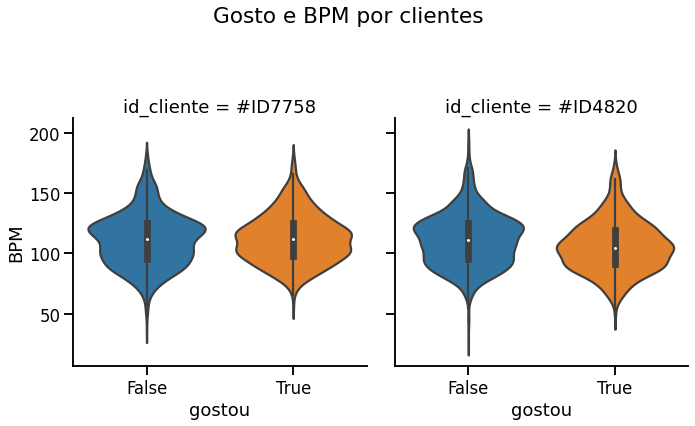

In [91]:
sns.catplot(data=df, y="BPM",x="gostou",col="id_cliente",
            kind="violin").fig.suptitle('Gosto e BPM por clientes',y=1.2)

Text(0.5, 1.2, 'Gosto e Volume médio por clientes')

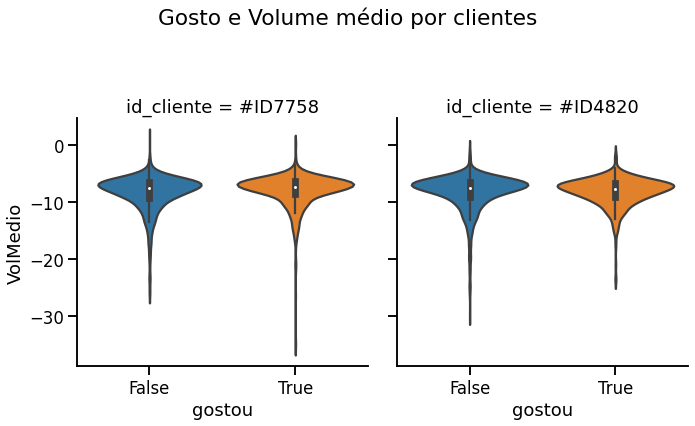

In [92]:
sns.catplot(data=df, y="VolMedio",x="gostou",col="id_cliente",
            kind="violin").fig.suptitle('Gosto e Volume médio por clientes',y=1.2)

Text(0.5, 1.0, 'Dispersão volume médio e BPM')

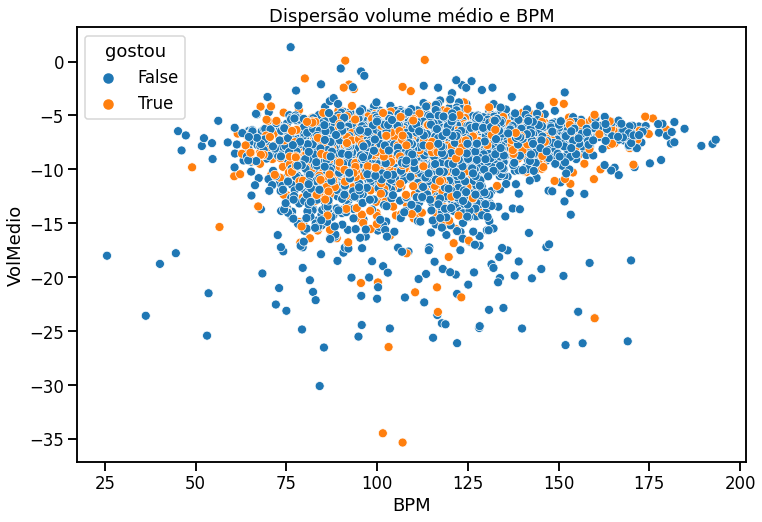

In [93]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=df, y="VolMedio",x="BPM", hue="gostou").set_title('Dispersão volume médio e BPM')


## Estudando a presença de instrumentos



### Matriz de Coocorrência

Número de vezes que cada instrumento aparece junto com outro

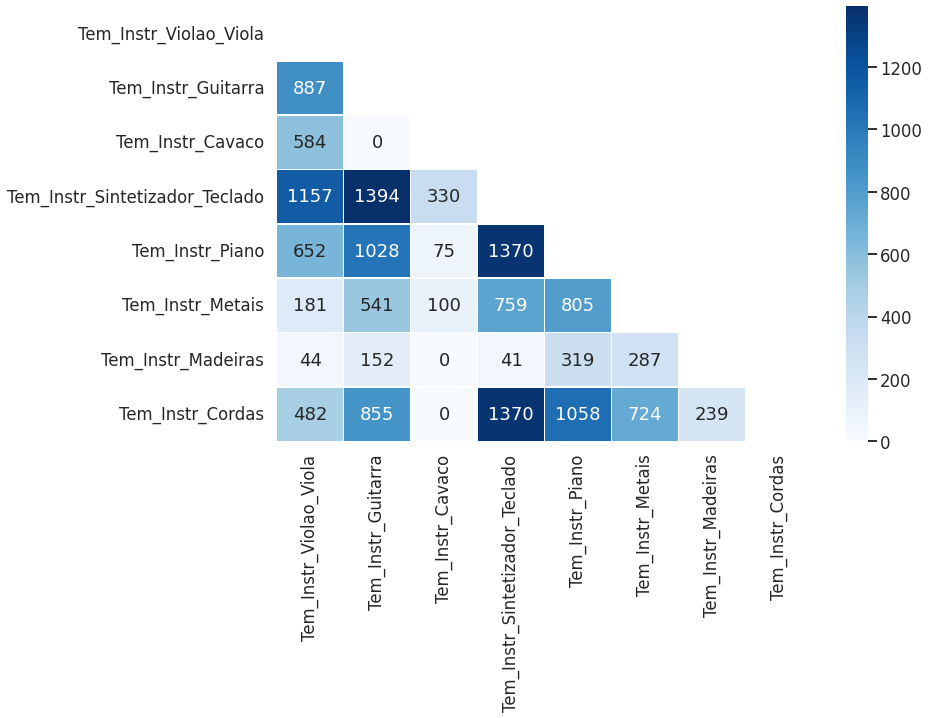

In [94]:
inst=df.loc[:,'Tem_Instr_Violao_Viola':'Tem_Instr_Cordas']
inst=inst.astype(int)
inst=inst.T.dot(inst)
sns.set_context('talk')
mask = np.zeros_like(inst)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(inst, mask=mask,linewidths=.5, annot=True,fmt="d", cmap='Blues')

### Matriz de correlação

Correlação do número de vezes que cada instrumento aparece junto com outro

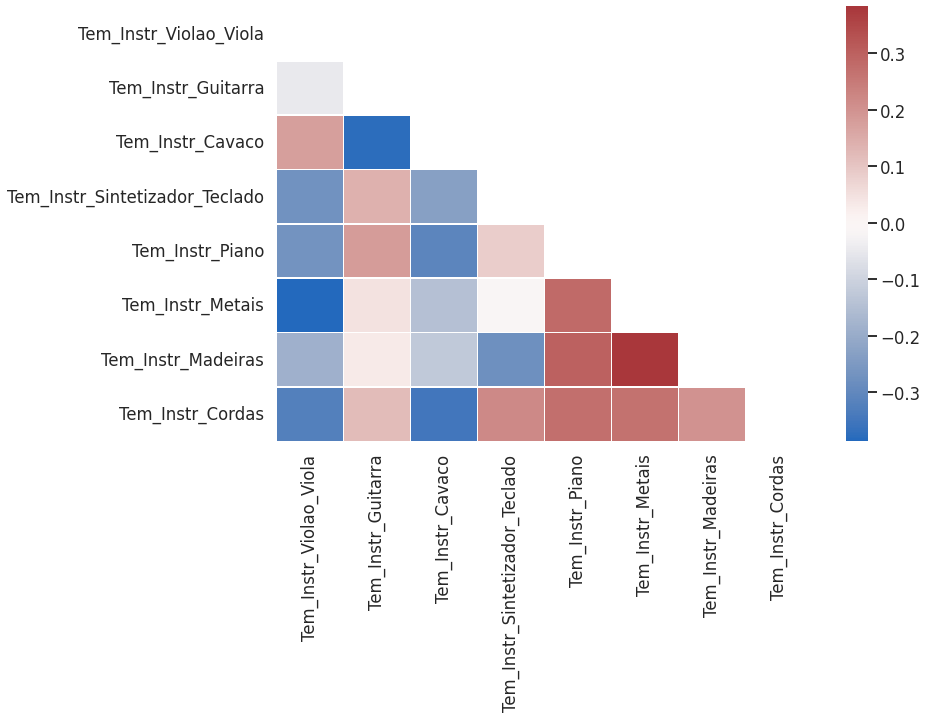

In [95]:
inst=df.loc[:,'Tem_Instr_Violao_Viola':'Tem_Instr_Cordas']
instcorr=inst.corr()
sns.set_context('talk')
mask = np.zeros_like(instcorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(instcorr, mask=mask,linewidths=.5, cmap='vlag')

Percebemos que alguns instrumentos aparecem de maneira mais consistente com outros. Da mesma forma, instrumentos como Cavaco e Guitarra dificilmente aparecem juntos.

## Explorar relação plays x gosto do usuario


In [96]:
playsXgostou = df.groupby('gostou')['n_reproducao'].value_counts()

playsXgostou_n = df.groupby('gostou')['n_reproducao'].value_counts(normalize=True)
playsXgostou_n=playsXgostou_n.reset_index(0)
playsXgostou_n.rename(columns={'n_reproducao':'contagem'}, inplace=True)
playsXgostou_n=playsXgostou_n.reset_index()

Text(0.5, 1.0, 'Relação de gosto e número de reproduções')

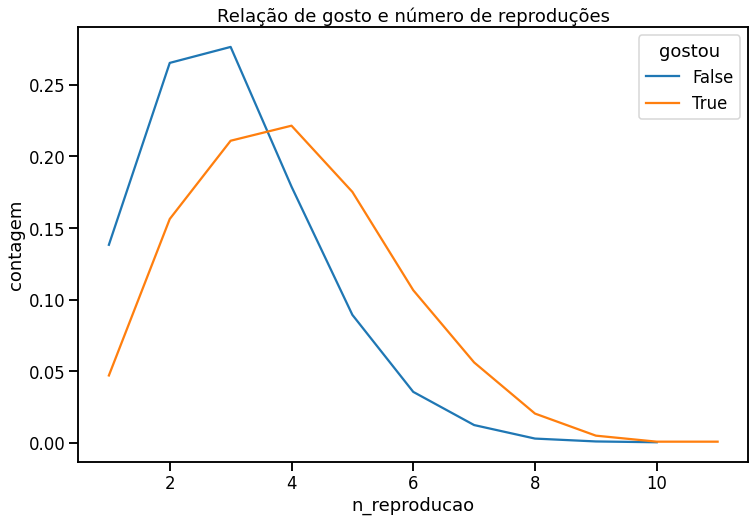

In [100]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
sns.lineplot(data=playsXgostou_n, x="n_reproducao",y='contagem', hue='gostou').set_title('Relação de gosto e número de reproduções')

In [ ]:
gostou.median()

80.0

In [ ]:
cliente1.columns

Index(['bateria', 'Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra',
       'Tem_Instr_Cavaco', 'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano',
       'Tem_Instr_Metais', 'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'BPM',
       'VolMedio', 'PctCantada', 'PctRap', 'duracao', 'ano_lancamento',
       'aovivo', 'modo', 'explicita', 'gostou', 'n_reproducao', 'id_cliente'],
      dtype='object')

## Gosto baseado no ano de lançamento

n de músicas que gostou em x ano / n de músicas daquele ano contidas na base

Transformação dados de ano de lançamento por decada



In [ ]:
#cliente1.groupby('ano_lancamento')['gostou'].value_counts(bins=4)
df.groupby('ano_lancamento')['gostou'].value_counts(bins=4)

ano_lancamento                  
1920            (0.9995, 1.0]         1
                (1.0005, 1.001]       0
                (1.0, 1.0005]         0
                (0.9989, 0.9995]      0
1921            (-0.0005, 0.0]        1
                                   ... 
2020            (0.25, 0.5]           0
2021            (-0.002, 0.25]      392
                (0.75, 1.0]         153
                (0.5, 0.75]           0
                (0.25, 0.5]           0
Name: gostou, Length: 384, dtype: int64

In [ ]:
#cliente1.groupby('ano_lancamento')['n_reproducao'].value_counts(bins=4)
df.groupby('ano_lancamento')['n_reproducao'].value_counts(bins=4)

ano_lancamento                            
1920            (5.997, 6.0]                    1
                (6.003, 6.006]                  0
                (6.0, 6.003]                    0
                (5.992999999999999, 5.997]      0
1921            (0.9995, 1.0]                   1
                                             ... 
2020            (5.5, 7.0]                     27
2021            (0.99, 3.25]                  343
                (3.25, 5.5]                   156
                (5.5, 7.75]                    40
                (7.75, 10.0]                    6
Name: n_reproducao, Length: 384, dtype: int64

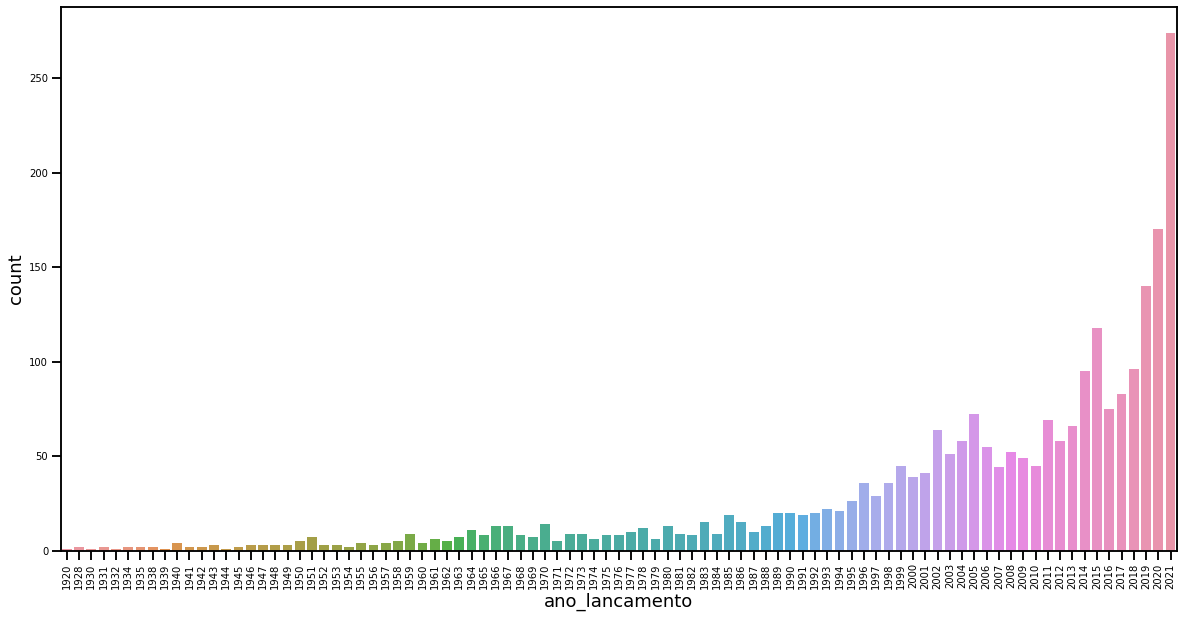

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
# sns.countplot(data=cliente1, x='ano_lancamento')
sns.countplot(data=cliente1, x='ano_lancamento')

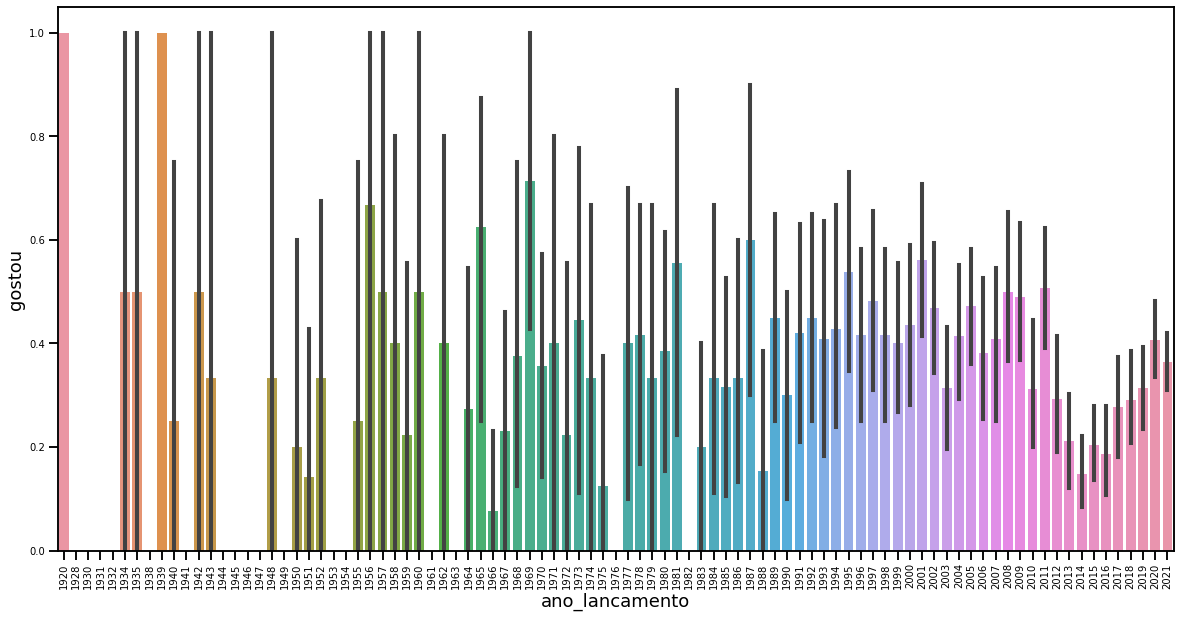

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
#sns.barplot(y='gostou', x='ano_lancamento', data=cliente1)
sns.barplot(y='gostou', x='ano_lancamento', data=cliente1)

Sem a incerteza temos:

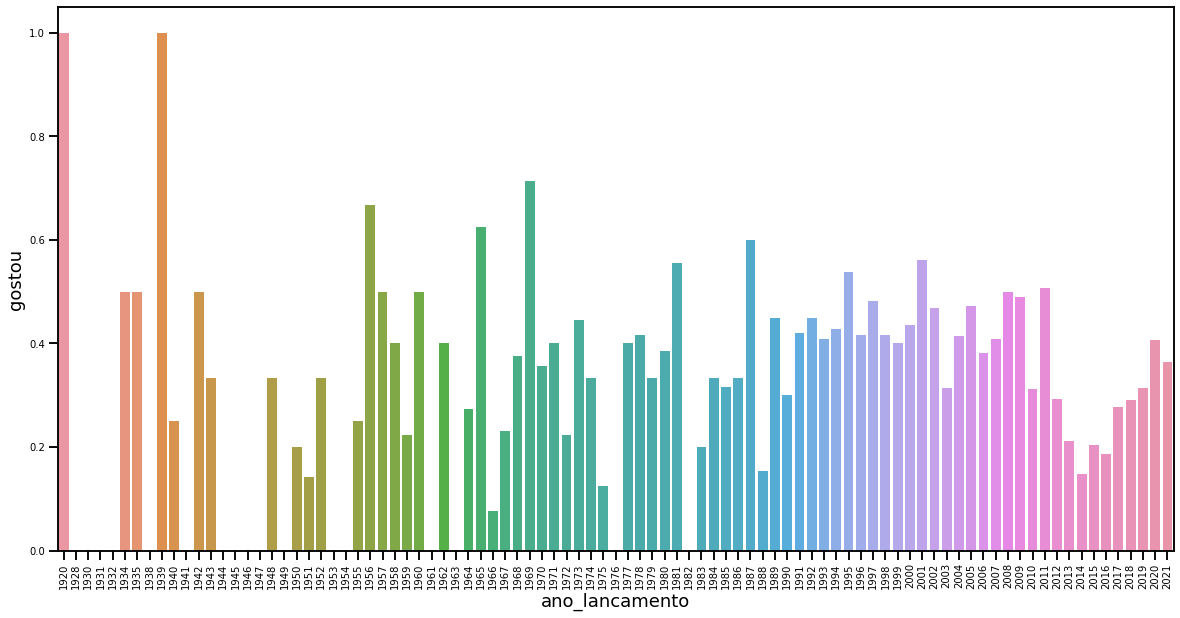

In [ ]:
n_info = cliente1.groupby('ano_lancamento', as_index=False)['gostou'].mean()
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='gostou', x='ano_lancamento', data=n_info)

Para o n de reproduções, temos:

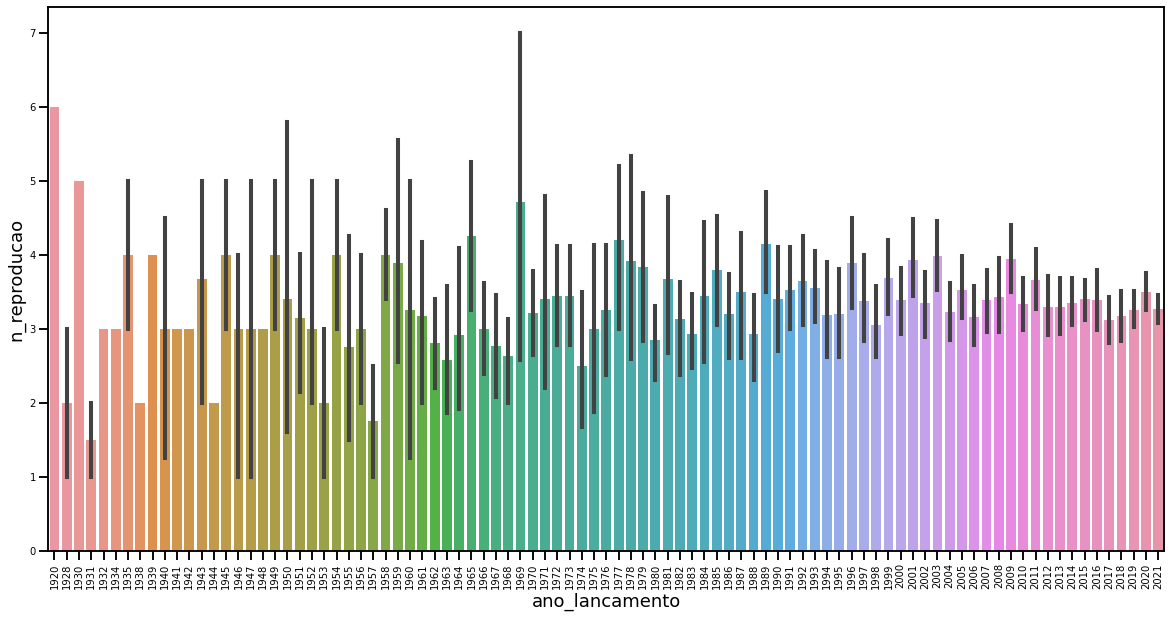

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='n_reproducao', x='ano_lancamento', data=cliente1)

In [ ]:
cliente1['ano_lancamento'].value_counts()

2021    274
2020    170
2019    140
2015    118
2018     96
       ... 
1930      1
1939      1
1932      1
1944      1
1920      1
Name: ano_lancamento, Length: 91, dtype: int64

In [ ]:
cliente1['ano_lancamento']/max(cliente1['ano_lancamento'].value_counts())

0       7.313869
1       7.295620
2       7.306569
3       7.266423
4       7.364964
          ...   
2470    7.361314
2471    7.354015
2472    7.375912
2473    7.335766
2474    7.321168
Name: ano_lancamento, Length: 2473, dtype: float64

In [ ]:
n_info_total = cliente1.groupby('ano_lancamento', as_index=False)['gostou','n_reproducao'].mean()
n_info_total['quantidade'] = cliente1.groupby('ano_lancamento', as_index=False)['gostou'].count()['gostou']
n_info_total.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ano_lancamento,gostou,n_reproducao,quantidade
0,1920,1.0,6.0,1
1,1928,0.0,2.0,2
2,1930,0.0,5.0,1
3,1931,0.0,1.5,2
4,1932,0.0,3.0,1


Fator de aceitação médio de ano com peso de quantidade de músicas

In [ ]:
n_info_total['FA_medio_peso'] = n_info_total['gostou']*n_info_total['n_reproducao']*(n_info_total['quantidade']/max(n_info_total['quantidade']))
n_info_total

,ano_lancamento,gostou,n_reproducao,quantidade,FA_medio_peso
0,1920,1.000000,6.000000,1,0.021898
1,1928,0.000000,2.000000,2,0.000000
2,1930,0.000000,5.000000,1,0.000000
3,1931,0.000000,1.500000,2,0.000000
4,1932,0.000000,3.000000,1,0.000000
...,...,...,...,...,...
86,2017,0.277108,3.120482,83,0.261938
87,2018,0.291667,3.166667,96,0.323601
88,2019,0.314286,3.257143,140,0.523045
89,2020,0.405882,3.500000,170,0.881387


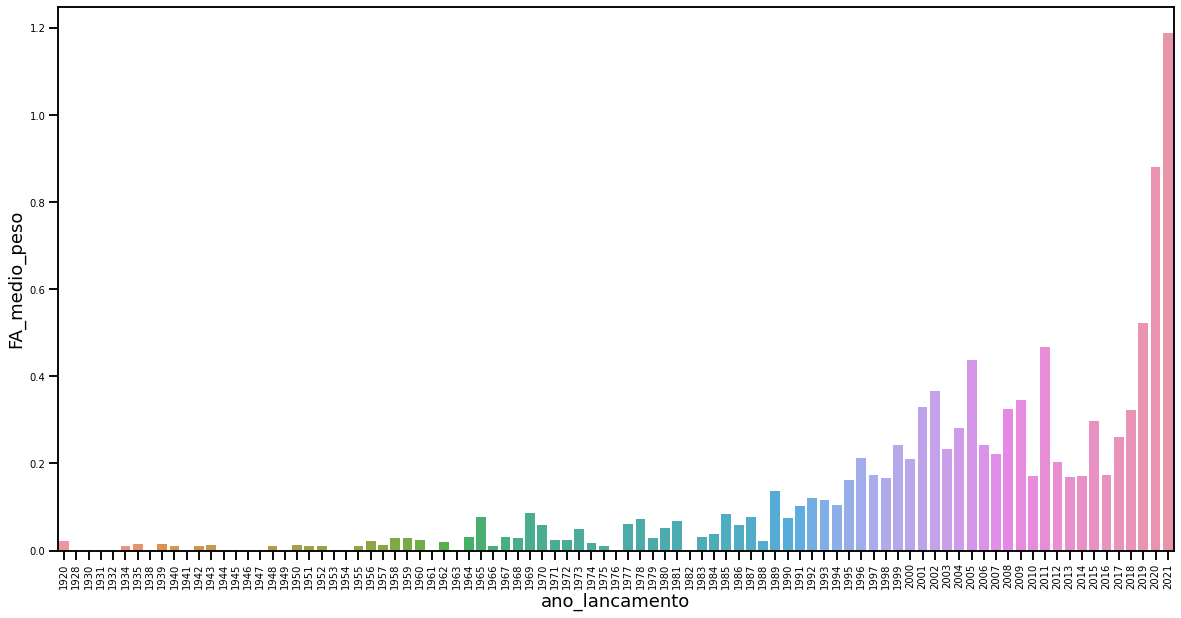

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_medio_peso', x='ano_lancamento', data=n_info_total)

Fator de aceitação de uma música:

In [ ]:
cliente1['FA_musica'] = cliente1['gostou']*(cliente1['n_reproducao']/max(cliente1['n_reproducao']))
cliente1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente,FA_musica
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758,0.222222
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758,0.888889
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758,0.000000
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758,0.000000
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758,0.777778


In [ ]:
cliente1['FA_musica'].value_counts()

0.000000    1612
0.444444     190
0.333333     166
0.555556     155
0.222222     131
0.666667      99
0.777778      51
0.111111      46
0.888889      18
1.000000       5
Name: FA_musica, dtype: int64

In [ ]:
cliente1['FA_musica'].mean()

0.15640023363436212

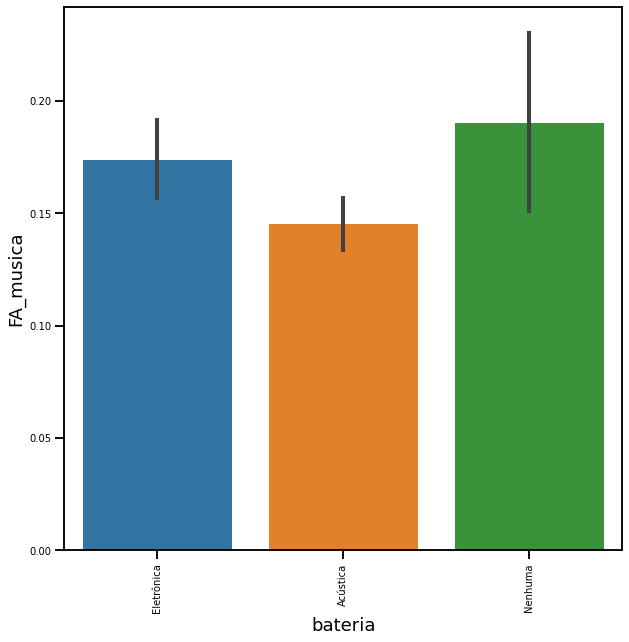

In [ ]:
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='bateria', data=cliente1)

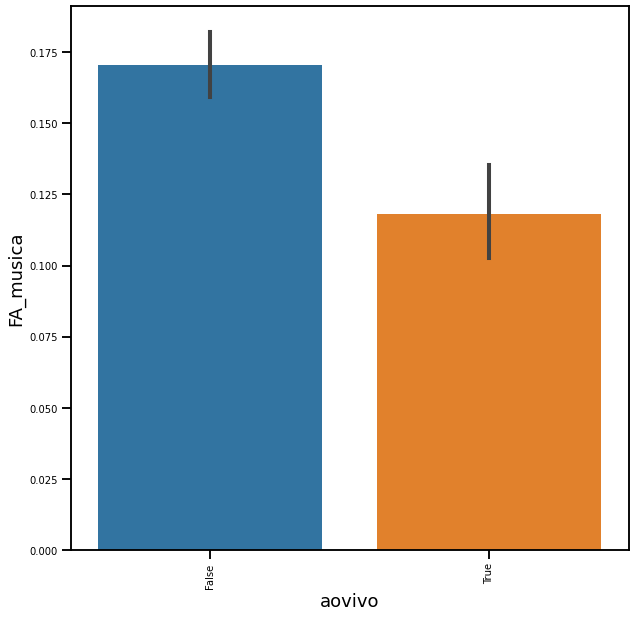

In [ ]:
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='aovivo', data=cliente1)

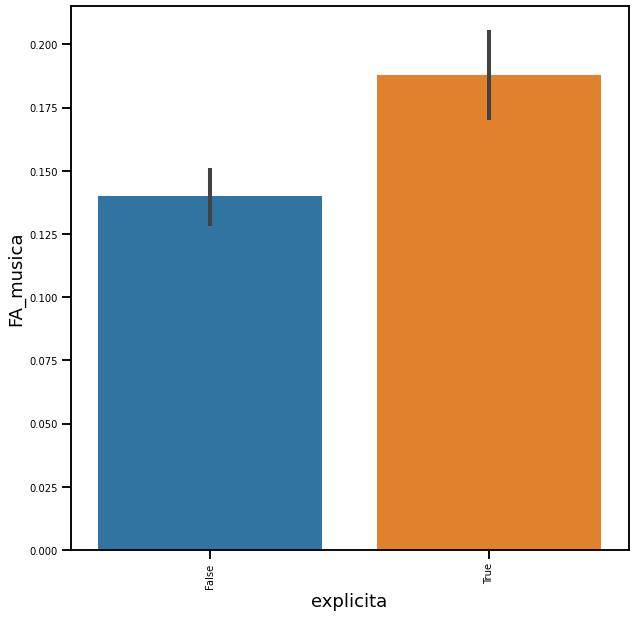

In [ ]:
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='explicita', data=cliente1)

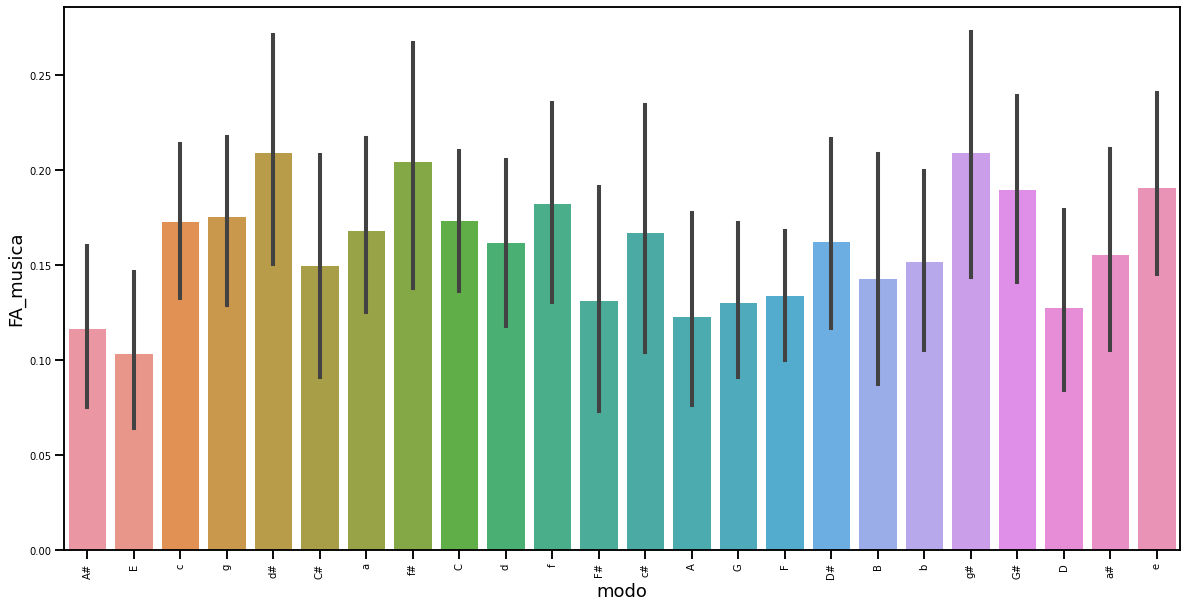

In [ ]:
plt.figure(0, figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='modo', data=cliente1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


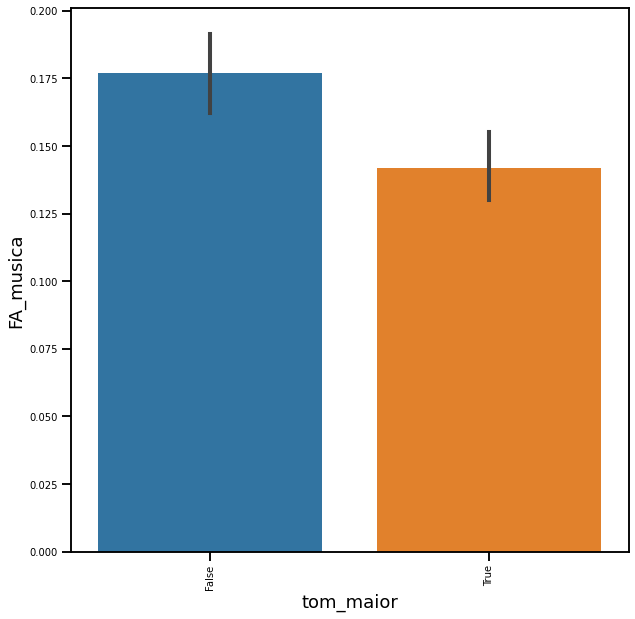

In [ ]:
cliente1['tom_maior'] = cliente1['modo'].str.strip('#').str.isupper()
plt.figure(0, figsize=(10,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
sns.barplot(y='FA_musica', x='tom_maior', data=cliente1)